In [8]:
from collections import namedtuple, defaultdict
from matplotlib import pyplot as plt
from vrift import Hunter, Tower, compute_prob2

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
tower = Tower()
hunter = Hunter(AR_TA=0.15, AR_Bulwark=0.25,
                CR_TA=1, CR_Bulwark=0.5, CR_Normal=0.82, CR_Eclipse=0.67,
                Run_Speed=10, Run_Sync=7, Run_Siphon=5, Run_Fire=True,
                Run_String=True, Run_Super_Siphon=True, Run_UU=True)
%time probs2 = compute_prob2(tower, hunter)

CPU times: user 54.5 s, sys: 136 ms, total: 54.7 s
Wall time: 54.7 s


0.999999791015253

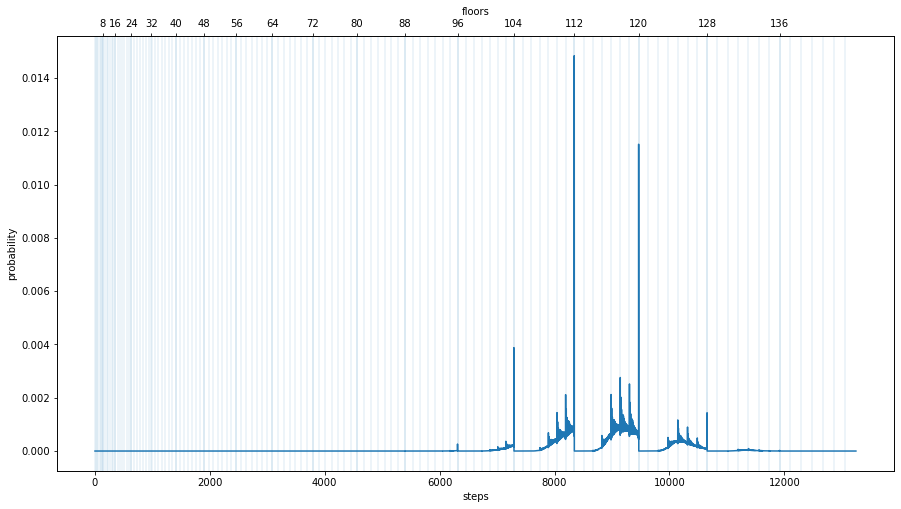

In [34]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(probs2)
ax1.set_xlabel('steps')
ax1.set_ylabel('probability')
for floor, steps in enumerate(tower.floor_start):
    if steps < len(probs2):
        ax1.axvline(x=steps, alpha=0.1) #1 if floor % 8 == 0 else

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
i = tower.eclipse_floor_steps.index(tower.next_eclipse_steps(len(probs2)))
ax2.set_xticks(tower.eclipse_floor_steps[:i])
ax2.set_xticklabels([j*8 for j in range(1, i+1)])
ax2.set_xlabel('floors')
sum(probs2)